In [160]:
#importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [216]:
#Assigning the csv path to a variable
csv_path = r"//home//mo//Documents//UNC//project1//Project1-Group//Boston2019.csv"

#useing pandas to read the file
df_read = pd.read_csv(csv_path, low_memory=False )

#Cleaning the owner-occupied cloumn
df_clean = df_read[(df_read["OWN_OCC"] == "Y") & (df_read["STRUCTURE_CLASS"] == "R") & (df_read["YR_BUILT"] >= 1900)&(df_read["R_BDRMS"] <= 7) & (df_read["R_BDRMS"] != 0) & (df_read["AV_TOTAL"] < 6000000)]

df_clean = df_clean[["AV_TOTAL", "LIVING_AREA", "R_BDRMS", "ZIPCODE","OWN_OCC", "STRUCTURE_CLASS" , "YR_BUILT","R_BLDG_STYL"]]
display(len(df_clean))



20892

In [218]:
df_clean["AV_TOTAL"].mean()

488000.09874593146

In [272]:
#grouping the house value and size by the zipcodes to decide 
zipcode_group_count= df_clean.groupby("ZIPCODE")[["AV_TOTAL" ]].count().round(2)

zipcode_group_count.sort_values(["AV_TOTAL"] , ascending=False)



,AV_TOTAL
ZIPCODE,
2132,5527
2136,3778
2131,2670
2124,1895
2130,1426
2126,1328
2135,783
2122,673
2128,622


In [270]:
zipcode_group = df_clean.groupby("ZIPCODE")[["AV_TOTAL" , "LIVING_AREA"]].mean().round(2)

zipcode_group.sort_values(["AV_TOTAL"])

reset_zipcode_data = zipcode_group
reset_zipcode_data

,AV_TOTAL,LIVING_AREA
ZIPCODE,,
2026,510100.00,1836.00
2108,3371285.71,2922.00
2109,835736.00,1194.00
2113,1272166.67,2413.17
2114,2838765.95,2784.57
2115,2742960.00,3132.00
2116,2105933.33,2179.50
2118,2625184.00,2810.36
2119,350007.36,1832.31


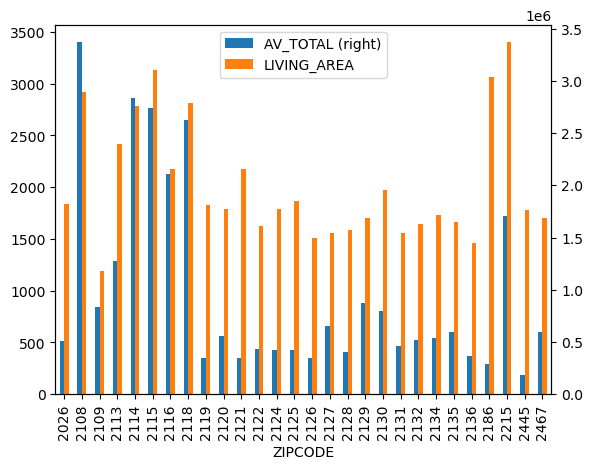

In [268]:
zip_fig = reset_zipcode_data.plot( kind= "bar" , secondary_y= "AV_TOTAL" , rot= 90 )
plt.show()

In [196]:
count_num_bdrms = df_clean.groupby("R_BDRMS")["AV_TOTAL"].count()
count_num_bdrms.head()


R_BDRMS
1      115
2     2630
3    11292
4     5047
5     1316
Name: AV_TOTAL, dtype: int64

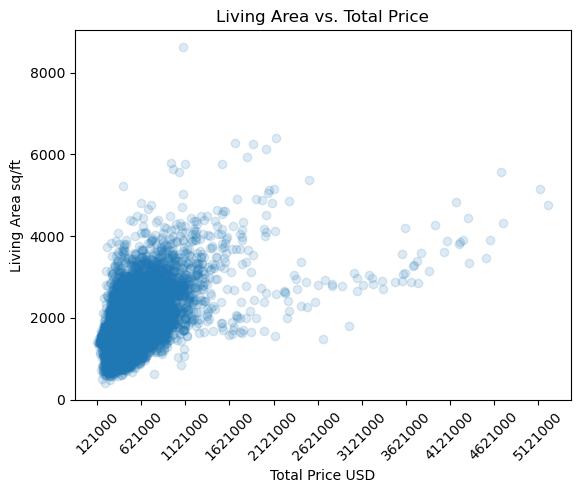

In [220]:
#Assiging variables 
house_value = df_clean["AV_TOTAL"]
living_area = df_clean["LIVING_AREA"]

#using seaborn to generate a scatter plot with alpha option to show the dense section of the plot
areaVsPrice = sns.regplot(x=house_value , y=living_area,scatter_kws={'alpha':0.15}, fit_reg= False)

#sitting labels
areaVsPrice.set(xlabel= "Total Price USD", ylabel="Living Area sq/ft")

#defining the start and end in the x-axis by using the min and max
areaVsPrice.set_xticks(np.arange(int(house_value.min()), int(house_value.max()), 500000))
areaVsPrice.set_xticklabels(np.arange(int(house_value.min()), int(house_value.max()), 500000), rotation=45)

#setting the title
areaVsPrice.set_title("Living Area vs. Total Price")


plt.show()
